In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Univariate Analysis


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


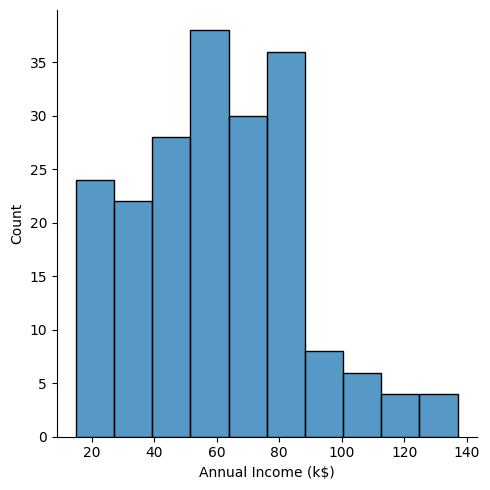

In [ ]:
sns.displot(df["Annual Income (k$)"]);

<Figure size 500x500 with 0 Axes>

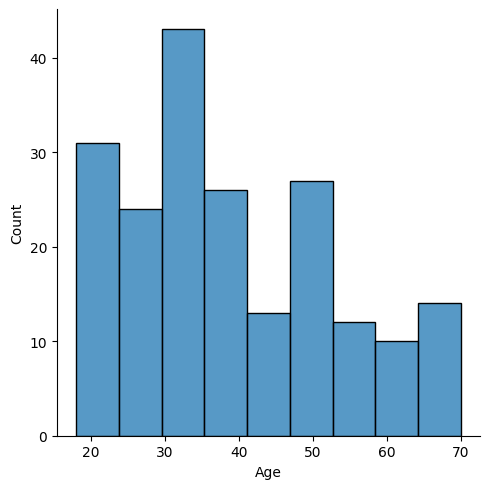

<Figure size 500x500 with 0 Axes>

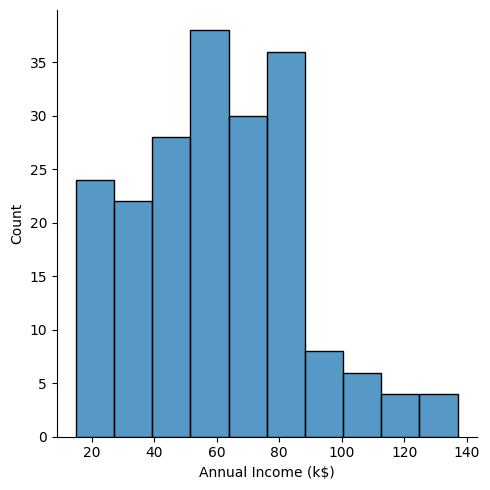

<Figure size 500x500 with 0 Axes>

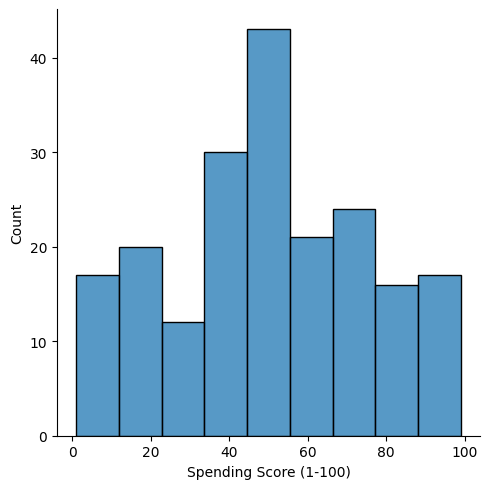

In [ ]:
columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]

for i in columns:
    plt.figure(figsize=(5,5))
    sns.displot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

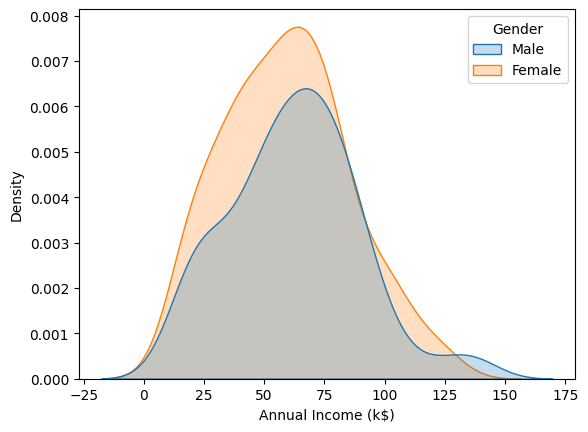

In [ ]:
sns.kdeplot(data = df , x = "Annual Income (k$)", shade=True, hue="Gender")

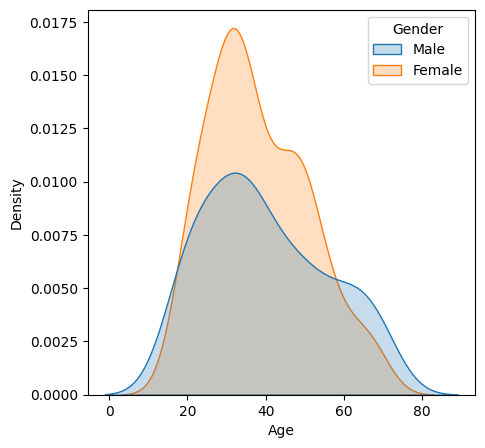

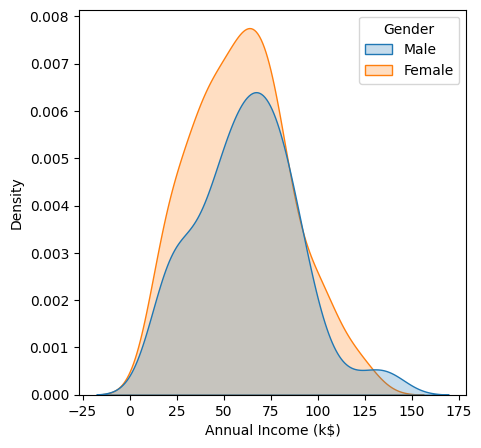

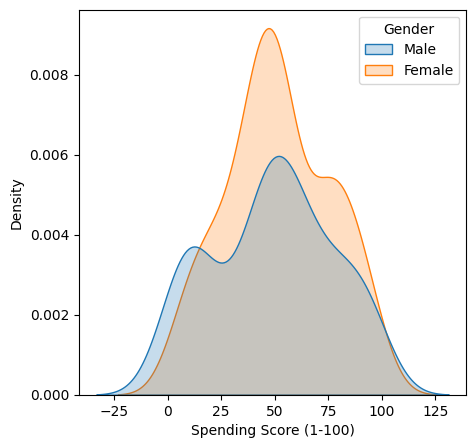

In [ ]:
columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]

for i in columns:
    plt.figure(figsize=(5,5))
    sns.kdeplot(data = df , x = df[i], shade=True, hue="Gender")

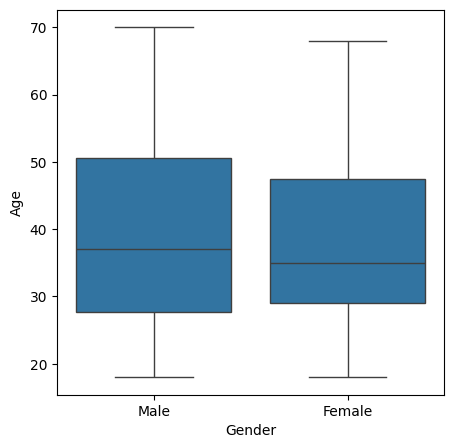

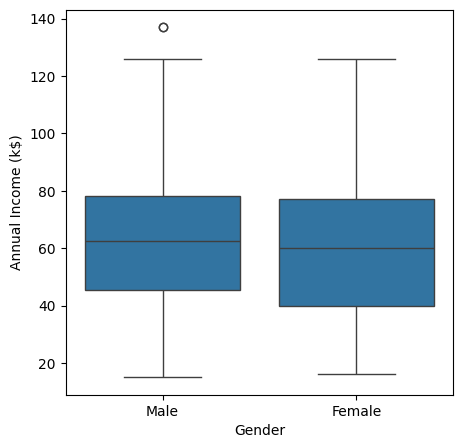

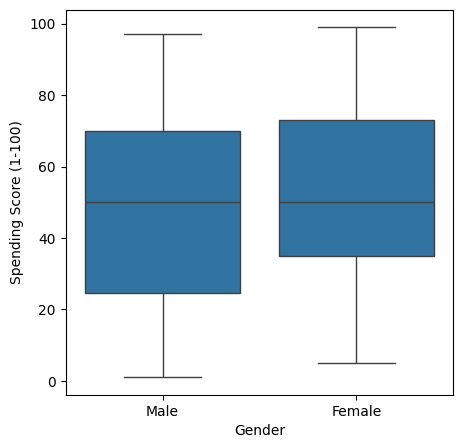

In [ ]:
columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]

for i in columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(data = df , x = "Gender", y = df[i])

In [ ]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


# Bivariate Aanalysis


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

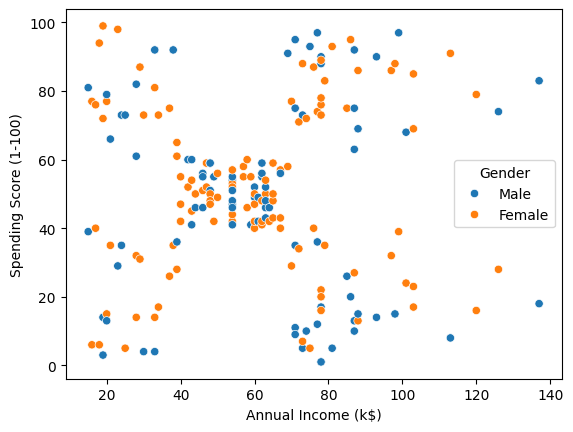

In [ ]:
sns.scatterplot(data = df , x = "Annual Income (k$)", y = "Spending Score (1-100)" , hue= "Gender" , )

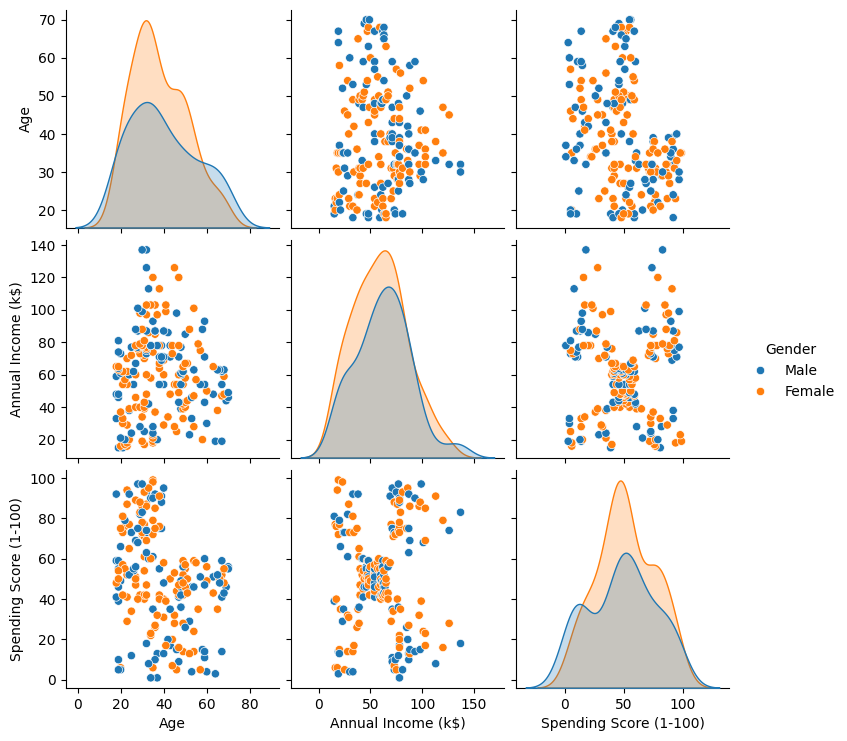

In [ ]:
df = df.drop(columns = "CustomerID" , axis = 1)
sns.pairplot(df, hue="Gender")


<Axes: >

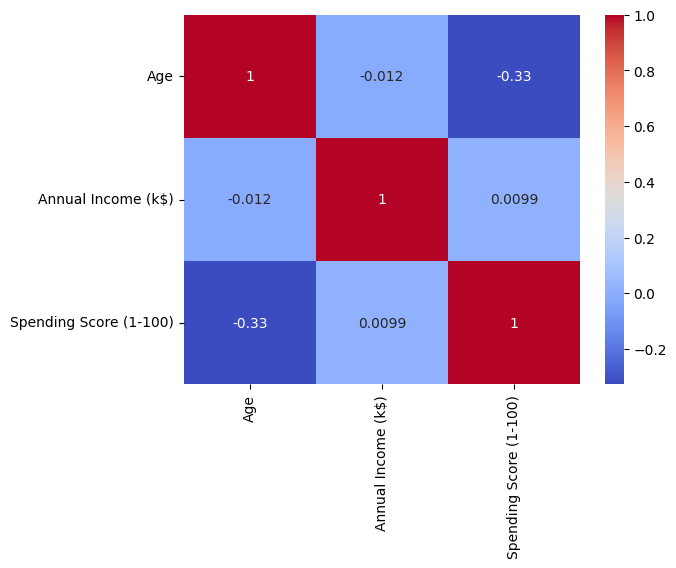

In [ ]:
numeric_df = df.drop(columns=["Gender"])

sns.heatmap(numeric_df.corr() , annot = True , cmap = "coolwarm")

# Clustering - Univariate , Bivariate , Multivariate

In [ ]:
clustering1 = KMeans()

In [ ]:
clustering1.fit(df[["Annual Income (k$)"]])

KMeans()

In [ ]:
df["Income_cluster"] = clustering1.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
0,Male,19,15,39,5
1,Male,21,15,81,5
2,Female,20,16,6,5
3,Female,23,16,77,5
4,Female,31,17,40,5
...,...,...,...,...,...
195,Female,35,120,79,7
196,Female,45,126,28,7
197,Male,32,126,74,7
198,Male,32,137,18,6


In [ ]:
df["Income_cluster"].value_counts()

,count
Income_cluster,
1,52
3,40
4,36
0,26
5,24
2,14
7,6
6,2


In [ ]:
clustering1.inertia_

3804.4083028083037

In [35]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
intertia_scores

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 14647.235170393054,
 8534.41515455305,
 5081.484660267269,
 4631.484660267269,
 3472.4870129870137,
 2217.640620490622,
 2048.8041125541135]

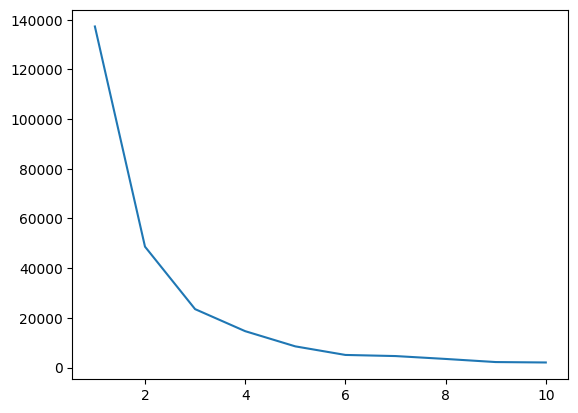

In [56]:
plt.plot(range(1,11),intertia_scores)


In [37]:

df.columns



Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income_cluster'],
      dtype='object')

In [41]:
cluster_means = df.groupby('Income_cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

In [42]:
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,36.692308,34.461538,48.807692
1,36.365385,78.692308,49.423077
2,38.142857,99.142857,53.357143
3,40.275000,62.850000,50.475000
4,46.611111,48.777778,50.916667
5,33.750000,19.750000,50.208333
6,31.000000,137.000000,50.500000
7,38.333333,119.666667,49.333333


In [43]:
#Bivariate Clustering
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster
0,Male,19,15,39,5,4
1,Male,21,15,81,5,1
2,Female,20,16,6,5,4
3,Female,23,16,77,5,1
4,Female,31,17,40,5,4


In [44]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

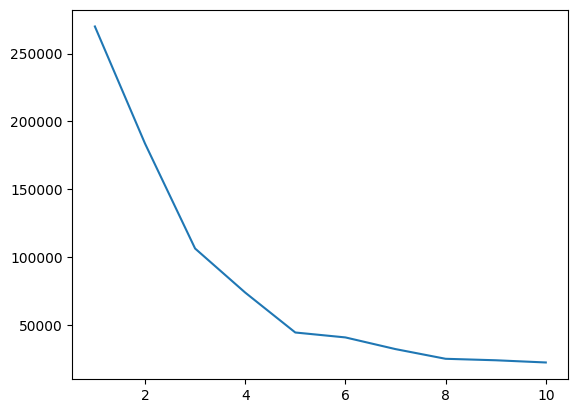

In [45]:

plt.plot(range(1,11),intertia_scores2)

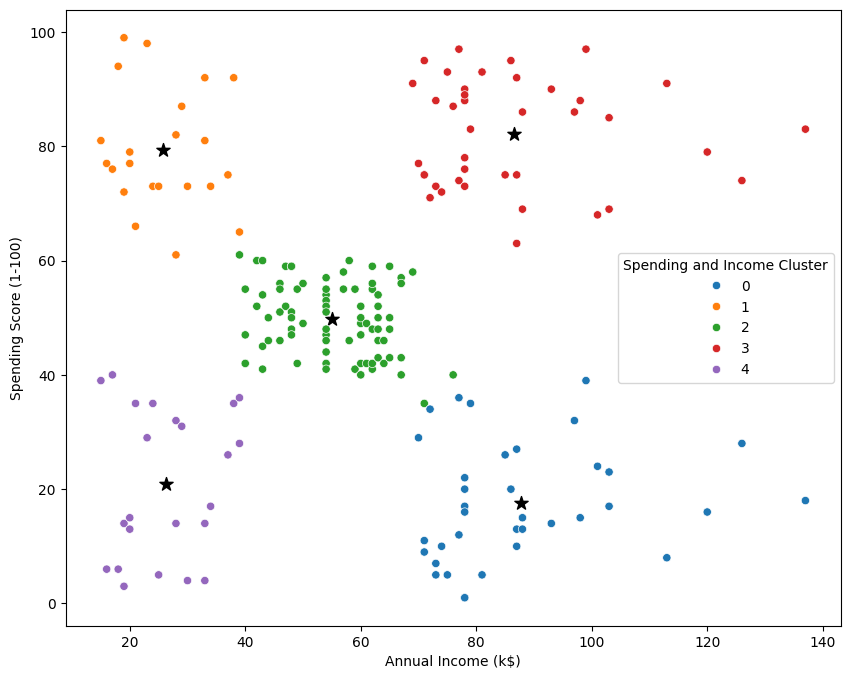

In [46]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [47]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.472222,0.527778
1,0.590909,0.409091
2,0.587500,0.412500
3,0.538462,0.461538
4,0.608696,0.391304


In [49]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,40.666667,87.750000,17.583333
1,25.272727,25.727273,79.363636
2,42.937500,55.087500,49.712500
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


In [50]:
#mulivariate clustering
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster
0,Male,19,15,39,5,4
1,Male,21,15,81,5,1
2,Female,20,16,6,5,4
3,Female,23,16,77,5,1
4,Female,31,17,40,5,4


In [51]:

dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,5,4,True
1,21,15,81,5,1,True
2,20,16,6,5,4,False
3,23,16,77,5,1,False
4,31,17,40,5,4,False


In [52]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [53]:
dff = scale.fit_transform(dff)
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [54]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)

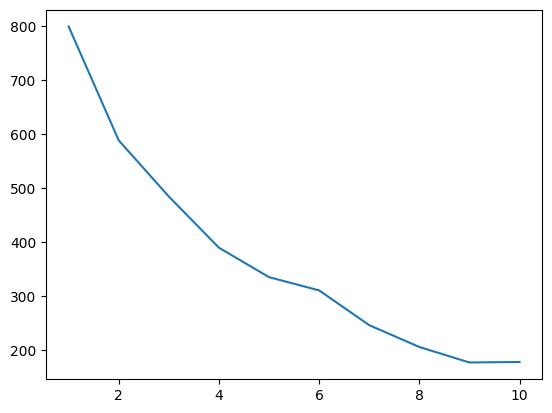

In [55]:
plt.plot(range(1,11),intertia_scores3)